
# Задание к лекции 04-1: Линейная регрессия 1

Name:

Email:




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

In [2]:
x0 = [0] * len(food_consump_dose0)
x2p5 = [2.5] * len(food_consump_dose2p5)
x5 = [5] * len(food_consump_dose5)

In [3]:
df1 = pd.DataFrame({'x':0, 'y':food_consump_dose0})
df2 = pd.DataFrame({'x':2.5, 'y':food_consump_dose2p5})
df3 = pd.DataFrame({'x':5, 'y':food_consump_dose5})

In [4]:
df = pd.concat([df1, df2, df3])
df

,x,y
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
0,2.5,73.3
1,2.5,84.8


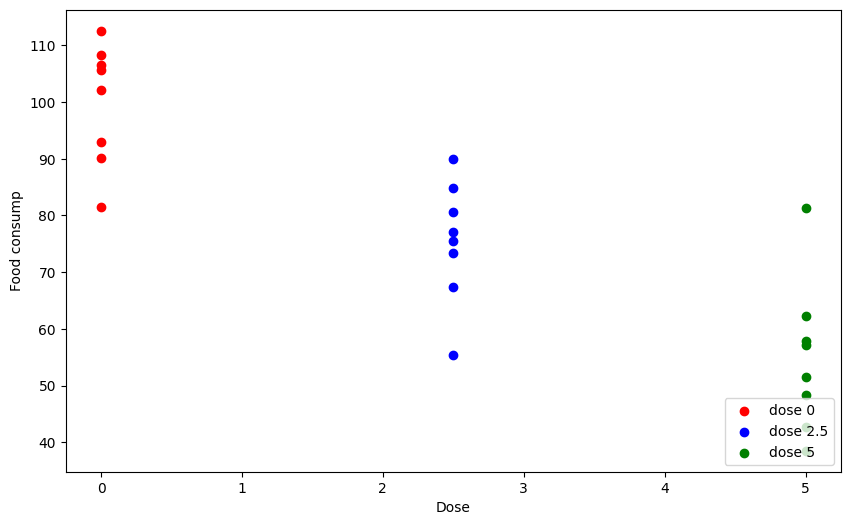

In [5]:
plt.scatter(x = x0, y = food_consump_dose0, color = "red", label = "dose 0")
plt.scatter(x = x2p5, y = food_consump_dose2p5, color = "blue", label = "dose 2.5")
plt.scatter(x = x5, y = food_consump_dose5, color = "green", label = "dose 5")
plt.legend(loc=4)
plt.xlabel('Dose')
plt.ylabel('Food consump')
plt.show()

In [6]:
df.describe()

,x,y
count,24.000000,24.000000
mean,2.500000,76.812500
std,2.085144,21.842685
min,0.000000,38.500000
25%,0.000000,57.700000
50%,2.500000,78.900000
75%,5.000000,90.900000
max,5.000000,112.600000


In [7]:
df_x_ols = sm.ols(formula = "y ~ x", data=df).fit()
df_x_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Sat, 11 May 2024   Prob (F-statistic):           7.27e-08
Time:                        11:58:04   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
x             -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

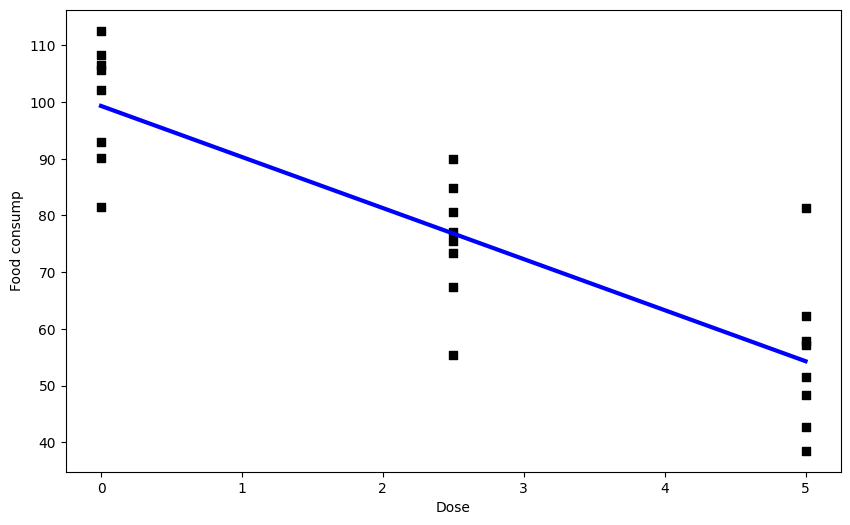

In [8]:
plt.scatter(x=df['x'],y=df['y'],c='k',marker='s')


plt.plot(df['x'],df_x_ols.predict(),color='blue',linewidth=3)

plt.xlabel('Dose')
plt.ylabel('Food consump')
plt.show()

**Ваш ответ: Начало линии равно $\hat{\beta}_0 = 99.33$ $\hat{\beta}_1 = -9.01$**

**Линейное уравнение - $Потребление пищи = 99.33 -9.01 *Доза$**

$$
R^2 = 0.739
$$
Модель объясняет 74% изменчивости потребляемой пищи

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



In [ ]:
# ваш код
df_x_ols.ssr

2859.860625

**Ваш ответ: сумма квадратов остатков равна 2859.860625**


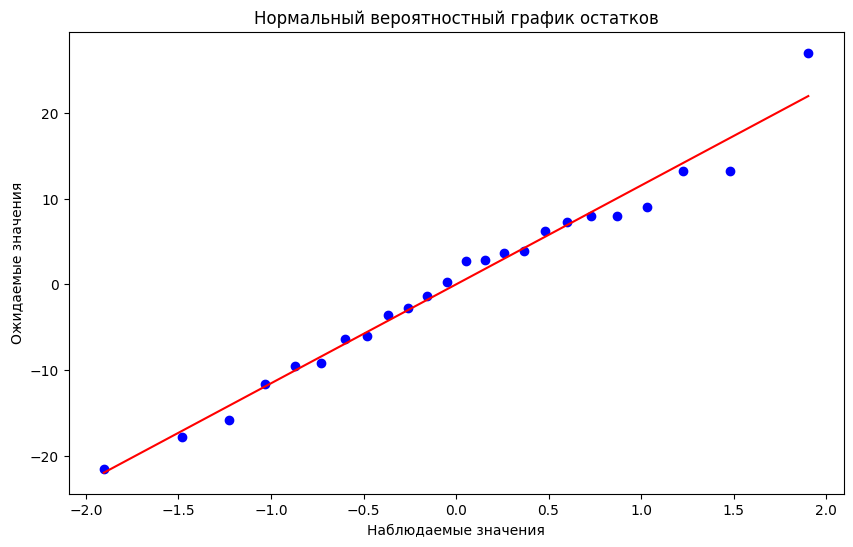

In [ ]:
import scipy.stats as stats

df['Predicted'] = df_x_ols.predict()
df['Residuals'] = df['y'] - df['Predicted']


stats.probplot(df['Residuals'], dist="norm", plot=plt)
plt.title('Нормальный вероятностный график остатков')
plt.ylabel('Ожидаемые значения')
plt.xlabel('Наблюдаемые значения')

plt.show()

Остатки распределены нормально.